<a href="https://colab.research.google.com/github/Al-x-R/Colab-examples/blob/master/titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/an-2-an/data/master/titanic_train.csv', index_col='PassengerId')
df.head(10)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S


In [0]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [0]:
#подчищаем
df.drop('Cabin', axis=1, inplace=True)
df.dropna(inplace=True) #удаляем пустые значения
df.shape

(712, 10)

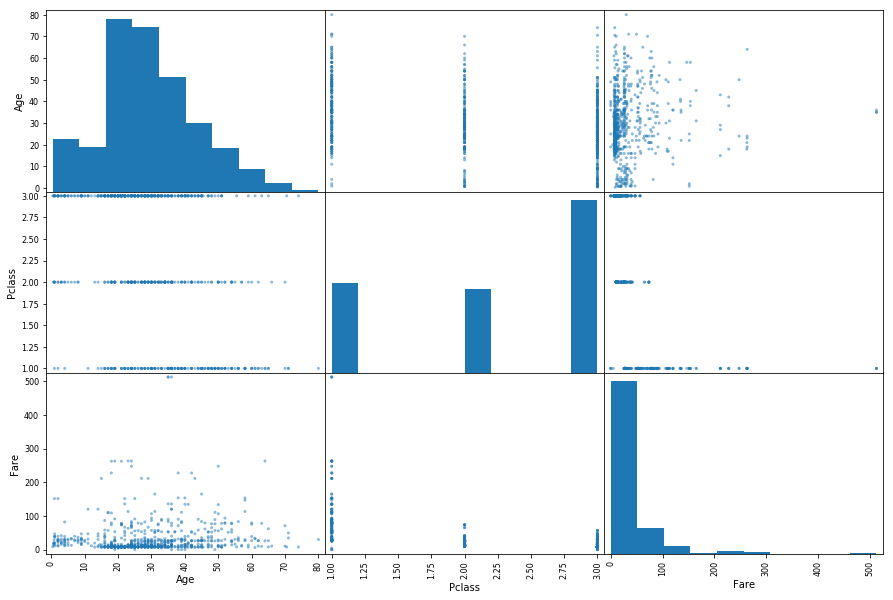

In [0]:
#изобразим попарно матрицу графиков
from pandas.plotting import scatter_matrix
fields = ['Age', 'Pclass', 'Sex', 'Fare']
scatter_matrix(df[fields], figsize=(15, 10));

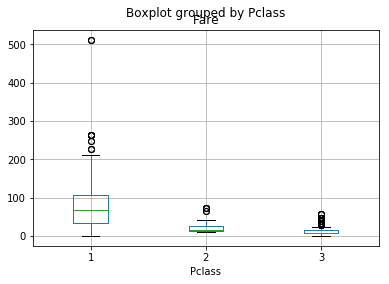

In [0]:
#как плата за билет зависит от класса каюты
df.boxplot(column='Fare', by='Pclass');

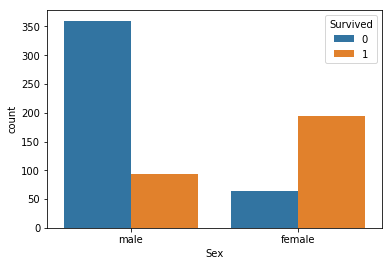

In [0]:
#соотношение погибших и выживших в зависимости от пола
import seaborn as sns
sns.countplot(x='Sex', hue='Survived', data=df);

In [0]:
df.pivot_table(index='Sex', values='Survived', aggfunc=['count','sum', 'mean'])

,count,sum,mean
,Survived,Survived,Survived
Sex,,,
female,259,195,0.752896
male,453,93,0.205298


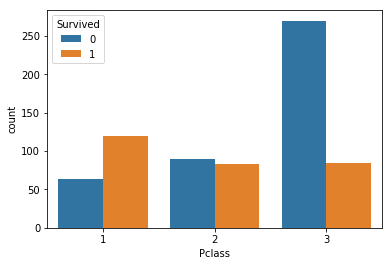

In [0]:
#соотношение погибших и выживших в зависимости от класса кают
sns.countplot(x='Pclass', hue='Survived', data=df);

In [0]:
#молодые(до 30) выживали чаще?
df['Young'] = (df['Age'] < 30).astype(int)
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Young
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,1
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0


In [0]:
df.groupby('Young')['Survived'].mean() * 100.0

Young
0    40.243902
1    40.625000
Name: Survived, dtype: float64

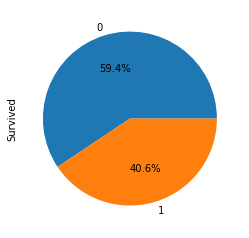

In [0]:
df[df['Young']==1]['Survived'].value_counts().plot.pie(autopct='%1.1f%%');

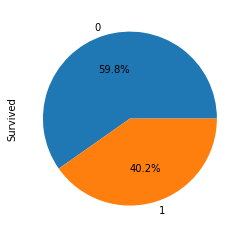

In [0]:
df[df['Young']==0]['Survived'].value_counts().plot.pie(autopct='%1.1f%%');